<a href="https://colab.research.google.com/github/tuba89/happy_house/blob/main/CP_HAPPY_HOUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [ ]:
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics import confusion_matrix
from keras.utils.data_utils import get_file
from keras.preprocessing import image
from matplotlib.pyplot import imshow
from keras.utils import layer_utils
from keras.models import Sequential
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.models import Model
import keras.backend as K
from keras import layers
import seaborn as sns
import numpy as np
import pydot
import h5py

K.set_image_data_format('channels_last')

In [ ]:
train_path = "/content/drive/MyDrive/train_happy.h5"
test_path = "/content/drive/MyDrive/test_happy.h5"

In [ ]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y(class) reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!



![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)


Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures

# Load Dataset

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset(train_path,test_path)

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape test_class and train_class
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


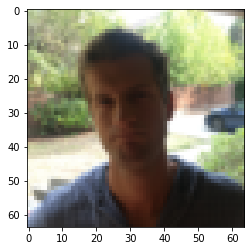

In [ ]:
# Sample image from dataset
print("Image shape :", X_train_orig[10].shape)
imshow(X_train_orig[10]);

In [ ]:
classes = ["not happy", "happy"]
classes[0]

'not happy'

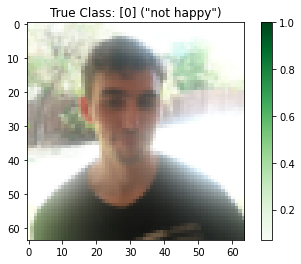

In [ ]:
plt.figure()
# select a random index from training images
random_index = np.random.randint(0, len(X_train))

plt.imshow(X_train[random_index], cmap= plt.cm.Greens)
plt.colorbar()

numerical_label = Y_train[random_index] # select the index number of label of the random image selected
text_description = classes[int(numerical_label)] # the Title of the class

plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))
plt.gca().grid(False)

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [ ]:
model = Sequential([
                  # Conv2D with 32 7x7 filters 
                  
                  layers.Conv2D(filters=32,
                                kernel_size=(7,7),
                                strides=(1,1),
                                padding='same',
                                use_bias=True,
                                input_shape=(64,64,3)),
                                            
                  # BatchNormalization for axis 3
                  BatchNormalization(axis=3),
                  Activation("relu"),
                  # Max Pooling 2D with default parameters
                  layers.MaxPooling2D(),
                  # Flatten layer
                  layers.Flatten(),
                  # Dense network with 1 unit for output and sigmoid activation function
                  layers.Dense(1, activation='sigmoid')
                  ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

In [ ]:
history_model = model.fit(X_train, 
                          Y_train, 
                          batch_size=1, 
                          epochs=5, 
                          verbose=1)

Epoch 1/5
600/600 [==============================] - 8s 13ms/step - loss: 0.1529 - accuracy: 0.9467
Epoch 2/5
600/600 [==============================] - 7s 12ms/step - loss: 0.1274 - accuracy: 0.9717
Epoch 3/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0696 - accuracy: 0.9800
Epoch 4/5
600/600 [==============================] - 8s 13ms/step - loss: 0.1269 - accuracy: 0.9583
Epoch 5/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0709 - accuracy: 0.9733


In [ ]:
score_adam = model.evaluate(X_test, Y_test, verbose=0)

print(f'{score_adam[1]*100:.2f} % Accuracy of CNN with adam opt.')
print('Loss = {:.2f}'.format(score_adam[0]))
# print('Loss = {:.2f} %'.format(score_adam[0]*100))

94.67 % Accuracy of CNN with adam opt.
Loss = 0.11


In [ ]:
model.compile(optimizer='SGD', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

history_model = model.fit(X_train, 
                          Y_train, 
                          batch_size=1, 
                          epochs=5, 
                          verbose=1)

Epoch 1/5
600/600 [==============================] - 9s 14ms/step - loss: 0.0347 - accuracy: 0.9867
Epoch 2/5
600/600 [==============================] - 8s 14ms/step - loss: 0.0220 - accuracy: 0.9883
Epoch 3/5
600/600 [==============================] - 8s 14ms/step - loss: 0.0143 - accuracy: 0.9967
Epoch 4/5
600/600 [==============================] - 8s 14ms/step - loss: 0.0153 - accuracy: 0.9950
Epoch 5/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0065 - accuracy: 0.9983


In [ ]:
score_sgd = model.evaluate(X_test, Y_test, verbose=0)

print(f'{score_sgd[1]*100:.2f} % Accuracy of CNN with SGD opt.')
print('Loss = {:.2f}'.format(score_sgd[0]))

96.00 % Accuracy of CNN with SGD opt.
Loss = 0.10


In [ ]:
model.compile(optimizer='AdaDelta', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

history_model = model.fit(X_train, 
                          Y_train, 
                          batch_size=1, 
                          epochs=5, 
                          verbose=1)

Epoch 1/5
600/600 [==============================] - 9s 14ms/step - loss: 0.0083 - accuracy: 0.9983
Epoch 2/5
600/600 [==============================] - 8s 14ms/step - loss: 0.0083 - accuracy: 0.9983
Epoch 3/5
600/600 [==============================] - 8s 14ms/step - loss: 0.0083 - accuracy: 0.9983
Epoch 4/5
600/600 [==============================] - 8s 14ms/step - loss: 0.0083 - accuracy: 0.9983
Epoch 5/5
600/600 [==============================] - 8s 14ms/step - loss: 0.0083 - accuracy: 0.9983


In [ ]:
score_adadelta = model.evaluate(X_test, Y_test, verbose=0)

print(f'{score_adadelta[1]*100:.2f} % Accuracy of CNN with adadelta opt.')
print('Loss = {:.2f}'.format(score_adadelta[0]))

96.67 % Accuracy of CNN with adadelta opt.
Loss = 0.10


In [ ]:
model.compile(optimizer='AdaGrad', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

history_model = model.fit(X_train, 
                          Y_train, 
                          batch_size=1, 
                          epochs=5, 
                          verbose=1)

Epoch 1/5
600/600 [==============================] - 9s 14ms/step - loss: 0.0085 - accuracy: 0.9983
Epoch 2/5
600/600 [==============================] - 8s 14ms/step - loss: 0.0066 - accuracy: 0.9983
Epoch 3/5
600/600 [==============================] - 8s 14ms/step - loss: 0.0060 - accuracy: 0.9983
Epoch 4/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0055 - accuracy: 0.9983
Epoch 5/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0052 - accuracy: 0.9983


In [ ]:
score_adagrad = model.evaluate(X_test, Y_test, verbose=0)

print(f'{score_adagrad[1]*100:.2f} % Accuracy of CNN with adagrad opt.')
print('Loss = {:.2f}'.format(score_adagrad[0]))

96.67 % Accuracy of CNN with adagrad opt.
Loss = 0.10


In [ ]:
model.compile(optimizer='RMSProp', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

history_model = model.fit(X_train, 
                          Y_train, 
                          batch_size=1, 
                          epochs=5, 
                          verbose=1)

Epoch 1/5
600/600 [==============================] - 9s 14ms/step - loss: 0.0442 - accuracy: 0.9883
Epoch 2/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0444 - accuracy: 0.9900
Epoch 3/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0370 - accuracy: 0.9900
Epoch 4/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0406 - accuracy: 0.9917
Epoch 5/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0247 - accuracy: 0.9900


In [ ]:
score_rms = model.evaluate(X_test, Y_test, verbose=0)

print(f'{score_rms[1]*100:.2f} % Accuracy of CNN with RMSprop opt.')
print('Loss = {:.2f}'.format(score_rms[0]))

98.00 % Accuracy of CNN with RMSprop opt.
Loss = 0.16


In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer= opt, 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

history_model = model.fit(X_train, 
                          Y_train, 
                          batch_size=1, 
                          epochs=5, 
                          verbose=1)

Epoch 1/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0299 - accuracy: 0.9967
Epoch 2/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0077 - accuracy: 0.9983
Epoch 3/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0139 - accuracy: 0.9983
Epoch 4/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0070 - accuracy: 0.9967
Epoch 5/5
600/600 [==============================] - 8s 13ms/step - loss: 0.0054 - accuracy: 0.9983


In [ ]:
score_sgd2 = model.evaluate(X_test, Y_test, verbose=0)

print(f'{score_sgd2[1]*100:.2f} % Accuracy on the Test set of SGD modified')
print('Loss = {:.2f}'.format(score_sgd2[0]))
# print('Loss = {:.2f} %'.format(score_sgd2[0]*100))

98.00 % Accuracy on the Test set of SGD modified
Loss = 0.07


In [ ]:
history_model = model.fit(X_train, 
                          Y_train, 
                          batch_size=1, 
                          epochs=10,
                          validation_data=(X_test, Y_test), 
                          verbose=1)

Epoch 1/10
600/600 [==============================] - 8s 13ms/step - loss: 6.6032e-04 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9733
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 8.2543e-04 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9733
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 7.8513e-04 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9667
Epoch 4/10
600/600 [==============================] - 8s 13ms/step - loss: 7.0535e-04 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9667
Epoch 5/10
600/600 [==============================] - 7s 12ms/step - loss: 6.2692e-04 - accuracy: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9733
Epoch 6/10
600/600 [==============================] - 7s 12ms/step - loss: 6.6672e-04 - accuracy: 1.0000 - val_loss: 0.0736 - val_accuracy: 0.9667
Epoch 7/10
600/600 [==============================] - 8s 13ms/step - loss: 6.0386e-04 - accuracy: 1.0000 - val_loss: 0

In [ ]:
# evaluating model
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 64ms/step - loss: 0.0682 - accuracy: 0.9733


[0.06821008026599884, 0.9733333587646484]

#### Visualisation of comparaison between training accuracy/cost and testing.

In [ ]:
history_model.history

{'accuracy': [0.996666669845581,
  0.9983333349227905,
  1.0,
  0.9983333349227905,
  1.0],
 'loss': [0.007931088097393513,
  0.004825621377676725,
  0.0025335822720080614,
  0.0019626279827207327,
  0.003477705642580986],
 'val_accuracy': [0.9733333587646484,
  0.9599999785423279,
  0.9666666388511658,
  0.9800000190734863,
  0.9599999785423279],
 'val_loss': [0.0497983880341053,
  0.05404626205563545,
  0.07084584981203079,
  0.06049002334475517,
  0.0903492197394371]}

#Loss

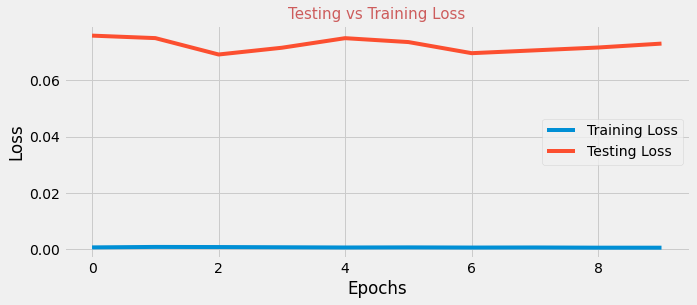

In [ ]:
plt.figure(figsize = (10, 4))
plt.style.use('fivethirtyeight')

train_loss = history_model.history['loss']
test_loss = history_model.history['val_loss'] 

count = range(len(train_loss))
plt.plot(count, train_loss, label='Training Loss')
plt.plot(count, test_loss, label='Testing Loss')
plt.title('Testing vs Training Loss', fontsize=15, c="indianred")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best');

#Accuracy


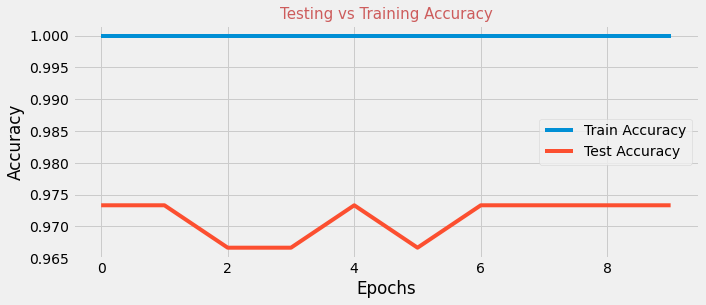

In [ ]:
plt.figure(figsize = (10, 4))
plt.style.use('fivethirtyeight')

train_acc = history_model.history['accuracy']
test_acc = history_model.history['val_accuracy'] 

count = range(len(train_acc))
plt.plot(count, train_acc, label='Train Accuracy')
plt.plot(count, test_acc, label='Test Accuracy')
plt.title('Testing vs Training Accuracy', fontsize=15, c="indianred")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best');

## I think that the model is overfiting

###Create a new model

In [ ]:
def NewModel(): 
    
    model_n = Sequential()
    # Cnn layers
    model_n.add(Conv2D(filters=32, 
                       kernel_size=(5,5), 
                       activation= 'relu',  
                       input_shape=(64, 64, 3)))
    model_n.add(BatchNormalization())
    model_n.add(MaxPooling2D(2))
    model_n.add(Conv2D(filters=16, 
                       kernel_size=(5,5), 
                       activation= 'relu', 
                       strides=(2, 2)))
    model_n.add(BatchNormalization())
    model_n.add(MaxPooling2D(2))
    model_n.add(Flatten())
    # Dense NN
    model_n.add(Dense(128, activation='relu'))
    model_n.add(Dropout(0.2))
    model_n.add(Dense(64, activation='relu'))
    model_n.add(Dropout(0.25))
    model_n.add(Dense(1, activation='sigmoid'))
    
    return model_n;   

In [ ]:
new_model = NewModel()
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 batch_normalization_4 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 16)        12816     
                                                                 
 batch_normalization_5 (Batc  (None, 13, 13, 16)       64        
 hNormalization)                                                 
                                                      

In [ ]:
new_rms = NewModel()
new_rms.compile(optimizer='RMSProp', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

In [ ]:
history_rms = new_rms.fit(X_train, 
                          Y_train, 
                          batch_size=16, 
                          epochs=25,
                          validation_data=(X_test, Y_test), 
                          verbose=1)

Epoch 1/25
38/38 [==============================] - 5s 102ms/step - loss: 0.6507 - accuracy: 0.6967 - val_loss: 0.6888 - val_accuracy: 0.6267
Epoch 2/25
38/38 [==============================] - 4s 97ms/step - loss: 0.3674 - accuracy: 0.8467 - val_loss: 0.7014 - val_accuracy: 0.6133
Epoch 3/25
38/38 [==============================] - 4s 98ms/step - loss: 0.3205 - accuracy: 0.8717 - val_loss: 0.5726 - val_accuracy: 0.6867
Epoch 4/25
38/38 [==============================] - 4s 98ms/step - loss: 0.2328 - accuracy: 0.9117 - val_loss: 0.5132 - val_accuracy: 0.7467
Epoch 5/25
38/38 [==============================] - 4s 98ms/step - loss: 0.1751 - accuracy: 0.9400 - val_loss: 0.5291 - val_accuracy: 0.7400
Epoch 6/25
38/38 [==============================] - 4s 99ms/step - loss: 0.2121 - accuracy: 0.9267 - val_loss: 0.3894 - val_accuracy: 0.8333
Epoch 7/25
38/38 [==============================] - 4s 101ms/step - loss: 0.1456 - accuracy: 0.9450 - val_loss: 0.4557 - val_accuracy: 0.8800
Epoch 8/25


In [ ]:
new_score_rms = new_rms.evaluate(X_test, Y_test, verbose=0)

print(f'{new_score_rms[1]*100:.2f} % Accuracy on the Test set of RMSprop')
print('Loss = {:.2f}'.format(new_score_rms[0]))


94.67 % Accuracy on the Test set of RMSprop
Loss = 0.20


In [ ]:
opt_n = SGD(learning_rate=0.01)
new_sgd = NewModel()
new_sgd.compile(optimizer= opt_n, 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

history_sgdl = new_sgd.fit(X_train, 
                          Y_train, 
                          batch_size=16, 
                          epochs=20,
                          validation_data=(X_test, Y_test),
                          verbose=1)

Epoch 1/20
38/38 [==============================] - 5s 101ms/step - loss: 0.6699 - accuracy: 0.6300 - val_loss: 0.6731 - val_accuracy: 0.5333
Epoch 2/20
38/38 [==============================] - 4s 96ms/step - loss: 0.4658 - accuracy: 0.7733 - val_loss: 0.6442 - val_accuracy: 0.7000
Epoch 3/20
38/38 [==============================] - 4s 96ms/step - loss: 0.4508 - accuracy: 0.7767 - val_loss: 0.5738 - val_accuracy: 0.8333
Epoch 4/20
38/38 [==============================] - 4s 96ms/step - loss: 0.3133 - accuracy: 0.8733 - val_loss: 0.5465 - val_accuracy: 0.8867
Epoch 5/20
38/38 [==============================] - 4s 95ms/step - loss: 0.3047 - accuracy: 0.8750 - val_loss: 0.5111 - val_accuracy: 0.8533
Epoch 6/20
38/38 [==============================] - 4s 96ms/step - loss: 0.2646 - accuracy: 0.9033 - val_loss: 0.4440 - val_accuracy: 0.8667
Epoch 7/20
38/38 [==============================] - 4s 96ms/step - loss: 0.2016 - accuracy: 0.9183 - val_loss: 0.4553 - val_accuracy: 0.8400
Epoch 8/20
3

In [ ]:
new_score_sgd = new_sgd.evaluate(X_test, Y_test, verbose=0)

print(f'{new_score_sgd[1]*100:.2f} % Accuracy on the Test set of SGD')
print('Loss = {:.2f}'.format(new_score_sgd[0]))

96.00 % Accuracy on the Test set of SGD
Loss = 0.14


In [ ]:
new_delta = NewModel()
new_delta.compile(optimizer='AdaDelta', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

history_delta = new_delta.fit(X_train, 
                          Y_train, 
                          batch_size=16, 
                          epochs=20,
                          validation_data=(X_test, Y_test),
                          verbose=1)

Epoch 1/20
38/38 [==============================] - 5s 102ms/step - loss: 0.7949 - accuracy: 0.5567 - val_loss: 0.6964 - val_accuracy: 0.5133
Epoch 2/20
38/38 [==============================] - 4s 96ms/step - loss: 0.7840 - accuracy: 0.5583 - val_loss: 0.7167 - val_accuracy: 0.4400
Epoch 3/20
38/38 [==============================] - 4s 95ms/step - loss: 0.7826 - accuracy: 0.5350 - val_loss: 0.7384 - val_accuracy: 0.4400
Epoch 4/20
38/38 [==============================] - 4s 96ms/step - loss: 0.7386 - accuracy: 0.5983 - val_loss: 0.7542 - val_accuracy: 0.4400
Epoch 5/20
38/38 [==============================] - 4s 94ms/step - loss: 0.7995 - accuracy: 0.5633 - val_loss: 0.7622 - val_accuracy: 0.4400
Epoch 6/20
38/38 [==============================] - 4s 93ms/step - loss: 0.7583 - accuracy: 0.5733 - val_loss: 0.7620 - val_accuracy: 0.4400
Epoch 7/20
38/38 [==============================] - 3s 92ms/step - loss: 0.7981 - accuracy: 0.5650 - val_loss: 0.7520 - val_accuracy: 0.4400
Epoch 8/20
3

In [ ]:
new_score_ada = new_delta.evaluate(X_test, Y_test, verbose=0)

print(f'{new_score_ada[1]*100:.2f} % Accuracy on the Test set of AdaDelta')
print('Loss = {:.2f}'.format(new_score_ada[0]))

64.67 % Accuracy on the Test set of AdaDelta
Loss = 0.64


In [ ]:
new_adam = NewModel()
new_adam.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

history_adam = new_adam.fit(X_train, 
                          Y_train, 
                          batch_size=16, 
                          epochs=20,
                          validation_data=(X_test, Y_test),
                          verbose=1)

Epoch 1/20
38/38 [==============================] - 5s 109ms/step - loss: 0.5458 - accuracy: 0.7267 - val_loss: 0.6830 - val_accuracy: 0.5533
Epoch 2/20
38/38 [==============================] - 4s 106ms/step - loss: 0.2716 - accuracy: 0.8883 - val_loss: 0.6902 - val_accuracy: 0.5467
Epoch 3/20
38/38 [==============================] - 4s 105ms/step - loss: 0.2344 - accuracy: 0.9050 - val_loss: 0.8864 - val_accuracy: 0.4400
Epoch 4/20
38/38 [==============================] - 4s 103ms/step - loss: 0.1571 - accuracy: 0.9383 - val_loss: 0.8699 - val_accuracy: 0.4533
Epoch 5/20
38/38 [==============================] - 4s 103ms/step - loss: 0.1578 - accuracy: 0.9400 - val_loss: 0.5858 - val_accuracy: 0.6467
Epoch 6/20
38/38 [==============================] - 4s 101ms/step - loss: 0.1376 - accuracy: 0.9517 - val_loss: 0.9473 - val_accuracy: 0.4867
Epoch 7/20
38/38 [==============================] - 4s 101ms/step - loss: 0.1226 - accuracy: 0.9550 - val_loss: 0.5213 - val_accuracy: 0.7267
Epoch 

In [ ]:
new_score_adam = new_adam.evaluate(X_test, Y_test, verbose=0)

print(f'{new_score_adam[1]*100:.2f} % Accuracy on the Test set of adam')
print('Loss = {:.2f}'.format(new_score_adam[0]))

94.00 % Accuracy on the Test set of adam
Loss = 0.16


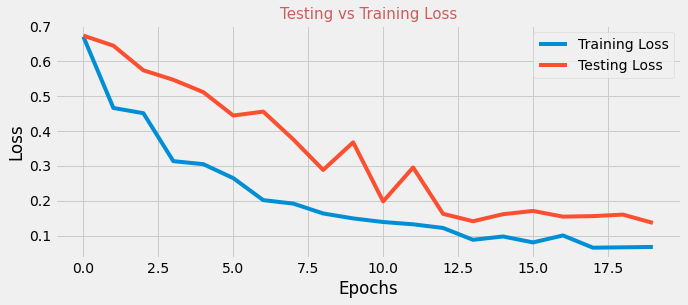

In [ ]:
plt.figure(figsize = (10, 4))
plt.style.use('fivethirtyeight')

train_loss = history_sgdl.history['loss']
test_loss = history_sgdl.history['val_loss'] 

count = range(len(train_loss))
plt.plot(count, train_loss, label='Training Loss')
plt.plot(count, test_loss, label='Testing Loss')
plt.title('Testing vs Training Loss', fontsize=15, c="indianred")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best');

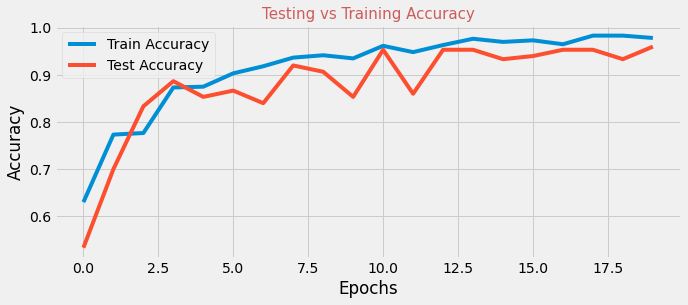

In [ ]:
plt.figure(figsize = (10, 4))
plt.style.use('fivethirtyeight')

train_acc = history_sgdl.history['accuracy']
test_acc = history_sgdl.history['val_accuracy'] 

count = range(len(train_acc))
plt.plot(count, train_acc, label='Train Accuracy')
plt.plot(count, test_acc, label='Test Accuracy')
plt.title('Testing vs Training Accuracy', fontsize=15, c="indianred")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best');

**Confusion** Matrix

In [ ]:
# Code Here
from sklearn.metrics import confusion_matrix , classification_report
y_pred =  new_sgd.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]


In [ ]:
y_pred[0]
y_pred_classes[:5]

[0, 0, 0, 0, 0]

In [ ]:
# i take 0.5 as the treshold
y_pred_max = (y_pred > 0.5).astype(np.int)

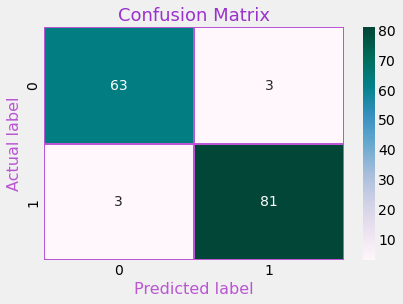

In [ ]:
cm = confusion_matrix(Y_test, y_pred_max)
ax = plt.axes()
sns.heatmap(cm, 
            annot = True, 
            cmap= plt.cm.PuBuGn,
            ax = ax,
            linewidths=1, 
            linecolor='mediumorchid')
ax.set_title('Confusion Matrix', fontsize=18, c="DarkOrchid")
plt.ylabel('Actual label',  fontsize=16, c="mediumorchid")
plt.xlabel('Predicted label', fontsize=16, c="mediumorchid");

The result is pretty good we got $144$ **true** result, and **$6$** ***wrong predictions***

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)

In [ ]:
text_labels = ["sad", "happy"]

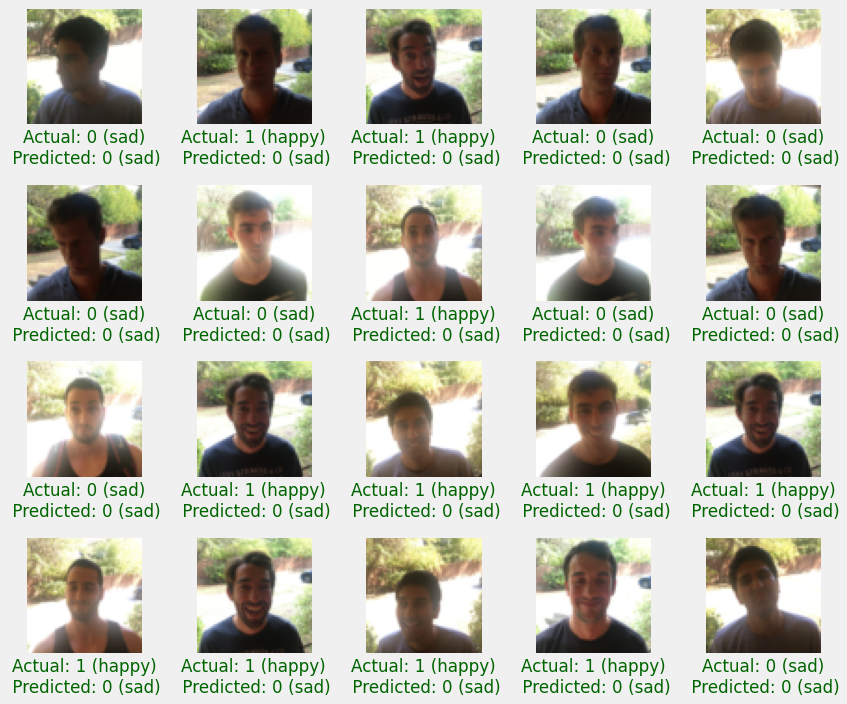

In [ ]:
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 150)
    plt.imshow(X_test[img_index], cmap=plt.cm.binary)
    
    actual_label = int(Y_test[img_index])
    predicted_label = int(y_pred[img_index])
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(actual_label, 
                                                             text_labels[actual_label], 
                                                             predicted_label, 
                                                             text_labels[predicted_label]), 
               c="darkgreen")
    
    
plt.tight_layout()
plt.show()